In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
credits_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\credits.csv')
movies_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\movies_metadata.csv')

C:\Users\v-lpilla\AppData\Local\Temp\ipykernel_19368\1722664016.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\movies_metadata.csv')


In [3]:
movies_df = movies_df.loc[movies_df['id'] != '1997-08-20']
movies_df = movies_df.loc[movies_df['id'] != '2012-09-29']
movies_df = movies_df.loc[movies_df['id'] != '2014-01-01']

In [4]:
movies_df['id'] = movies_df['id'].astype(int)
credits_df['id'] = credits_df['id'].astype(int)

merged_df = credits_df.merge(movies_df, on = 'id')
merged_df

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,tt6209470,fa,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45534,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt2028550,tl,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45535,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0303758,en,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45536,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506,False,NaN,0,[],NaN,tt0008536,en,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [5]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies_df = movies_df.loc[movies_df['popularity'] != 'Beware Of Frost Bites']

In [7]:
movies_df['popularity'] = movies_df['popularity'].astype('float') 

movies_df.sort_values(by = 'popularity', ascending = False)

movies_df.columns

movies_df[['title','genres','revenue','popularity']].head(100)

,title,genres,revenue,popularity
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",373554033.0,21.946943
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",262797249.0,17.015539
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,11.712900
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",81452156.0,3.859495
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",76578911.0,8.387519
...,...,...,...,...
95,La Haine,"[{'id': 18, 'name': 'Drama'}]",0.0,12.108196
96,Shopping,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",0.0,2.657647
97,Heidi Fleiss: Hollywood Madam,"[{'id': 99, 'name': 'Documentary'}]",0.0,0.638211
98,City Hall,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",0.0,4.807223


5.618232129131436


(array([ 3018.,   194.,   530.,  1614.,  4547., 11349., 14672.,  7713.,
         1500.,   398.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

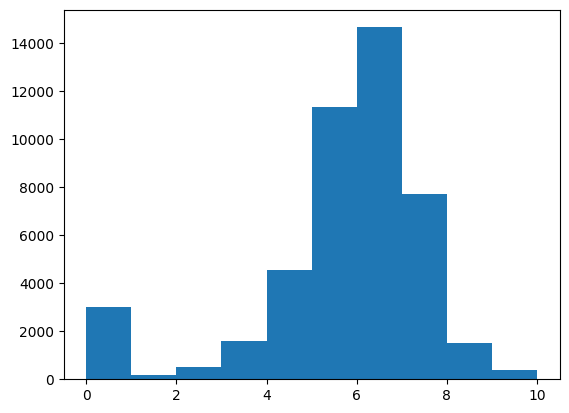

In [8]:
avg_rating = merged_df['vote_average'].mean()

print(avg_rating)

plt.hist( merged_df['vote_average'])

In [9]:
avg_vote_count = merged_df['vote_count'].mean()
print(avg_vote_count)

min_vote_count = merged_df['vote_count'].quantile(0.9)
print(min_vote_count)


109.79112770396398
160.0


In [10]:
valid_movies = merged_df.loc[merged_df['vote_count'] >= min_vote_count]
valid_movies

,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,tt0113277,en,...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0114576,en,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45275,"[{'cast_id': 6, 'character': 'Ryan Pierce', 'c...","[{'credit_id': '597a1749c3a3686868015efc', 'de...",417870,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3564472,en,...,2017-07-21,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"""Forgive us in advance for this wild weekend""",Girls Trip,False,7.1,393.0
45329,"[{'cast_id': 3, 'character': 'Mal', 'credit_id...","[{'credit_id': '57e3b56ac3a3682cb3001e4f', 'de...",417320,False,"{'id': 466463, 'name': 'Descendants Collection...",0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 107...",NaN,tt5117876,en,...,2017-07-21,0.0,111.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,Long live evil.,Descendants 2,False,7.5,171.0
45336,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt2121382,sv,...,2014-08-15,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0
45337,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt2121382,sv,...,2014-08-15,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0


In [11]:
def weighted_rating(df, m=min_vote_count, C=avg_rating):
    v = df['vote_count']
    R = df['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
valid_movies['score'] = valid_movies.apply(weighted_rating, axis = 1)
valid_movies

C:\Users\v-lpilla\AppData\Local\Temp\ipykernel_19368\4195139559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_movies['score'] = valid_movies.apply(weighted_rating, axis = 1)


,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,7.640254
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,6.820294
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5.660712
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,tt0113277,en,...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,7.537203
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0114576,en,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,5.556638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45275,"[{'cast_id': 6, 'character': 'Ryan Pierce', 'c...","[{'credit_id': '597a1749c3a3686868015efc', 'de...",417870,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3564472,en,...,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"""Forgive us in advance for this wild weekend""",Girls Trip,False,7.1,393.0,6.671279
45329,"[{'cast_id': 3, 'character': 'Mal', 'credit_id...","[{'credit_id': '57e3b56ac3a3682cb3001e4f', 'de...",417320,False,"{'id': 466463, 'name': 'Descendants Collection...",0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 107...",NaN,tt5117876,en,...,0.0,111.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,Long live evil.,Descendants 2,False,7.5,171.0,6.590384
45336,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt2121382,sv,...,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0,6.344379
45337,"[{'cast_id': 2, 'character': 'Ebba', 'credit_i...","[{'credit_id': '534fd1a80e0a267eb6000e32', 'de...",265189,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt2121382,sv,...,1359497.0,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0,6.344379


In [13]:
valid_movies = valid_movies.sort_values('score', ascending = False)

valid_movies[['title', 'vote_count', 'vote_average', 'score', 'popularity']].head(15)

,title,vote_count,vote_average,score,popularity
314,The Shawshank Redemption,8358.0,8.5,8.445870,51.645403
835,The Godfather,6024.0,8.5,8.425439,41.109264
10325,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421458,34.457024
12501,The Dark Knight,12269.0,8.3,8.265477,123.167259
2848,Fight Club,9678.0,8.3,8.256385,63.869599
292,Pulp Fiction,8670.0,8.3,8.251406,140.950236
522,Schindler's List,4436.0,8.3,8.206640,41.725123
23718,Whiplash,4376.0,8.3,8.205405,64.29999
5489,Spirited Away,3968.0,8.3,8.196056,41.048867
2215,Life Is Beautiful,3643.0,8.3,8.187173,39.39497


Text(0.5, 1.0, 'Popular Movies')

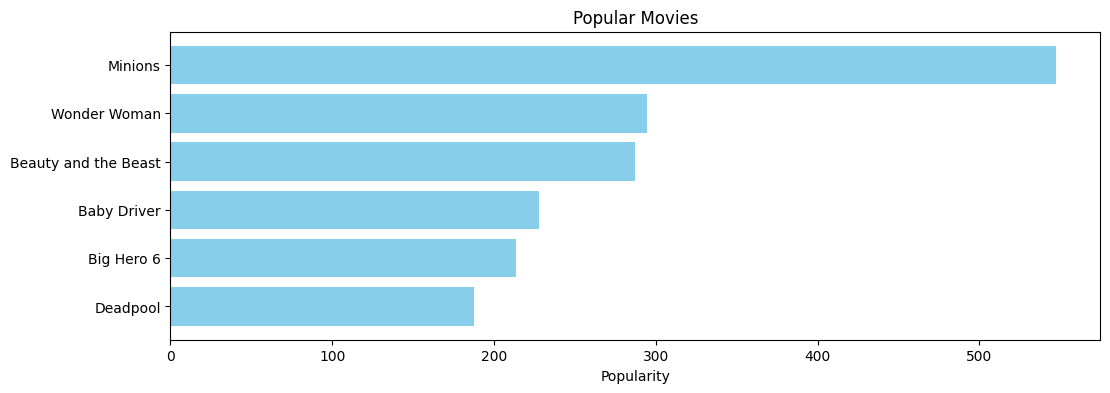

In [14]:
merged_df['popularity'] = merged_df['popularity'].astype('float')
pop= merged_df.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [15]:
print(merged_df.columns)
merged_df['overview'].head()

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

merged_df['overview'] = merged_df['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(merged_df['overview'])

tfidf_matrix.shape

(45538, 75827)

In [17]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [18]:
indices = pd.Series(merged_df.index, index = merged_df['title']).drop_duplicates()

In [19]:
def get_recommendations(title, cosine_sim = cosine_sim, indices = indices, merged_df = merged_df):
    if title not in indices:
        return f"'{title}' not found in the dataset."

    idx = indices[title]

    # Flatten to handle 2D row issue
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))

    # Sort by similarity, ignore the first item (self match)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Filter out-of-bounds indices
    movie_indices = [i[0] for i in sim_scores if i[0] < len(merged_df)]

    return merged_df['title'].iloc[movie_indices]

In [27]:
get_recommendations('Hulk')

4843         The Incredible Shrinking Man
3372                The Hideous Sun Demon
21354    The Death of the Incredible Hulk
22694                            Last Run
44338                     Brides of Blood
16249                      It Lives Again
24991                         Gunfighters
24576                              Animal
42500    The Tom Green Subway Monkey Hour
34728                Bigfoot's Reflection
Name: title, dtype: object

In [29]:
keywords_df = pd.read_csv(r'C:\\Users\\v-lpilla\\Downloads\\Recommendation System\\Data\\keywords.csv')
keywords_df['id'] = keywords_df['id'].astype(int)

merged_df = merged_df.merge(keywords_df, on = 'id')
merged_df.columns

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords'],
      dtype='object')

In [30]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    merged_df[feature] = merged_df[feature].apply(literal_eval)

In [31]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [32]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names

    return []

In [33]:
merged_df['director'] = merged_df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    merged_df[feature] = merged_df[feature].apply(get_list)

In [34]:
merged_df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)


,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


In [35]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [36]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    merged_df[feature] = merged_df[feature].apply(clean_data)

In [37]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [38]:
merged_df['soup'] = merged_df.apply(create_soup, axis=1)

In [39]:
merged_df['soup']

0        jealousy toy boy tomhanks timallen donrickles ...
1        boardgame disappearance basedonchildren'sbook ...
2        fishing bestfriend duringcreditsstinger walter...
3        basedonnovel interracialrelationship singlemot...
4        baby midlifecrisis confidence stevemartin dian...
                               ...                        
46623    tragiclove leilahatami kouroshtahami elhamkord...
46624    artist play pinoy angelaquino perrydizon hazel...
46625     erikaeleniak adambaldwin juliedupage markl.le...
46626     iwanmosschuchin nathalielissenko pavelpavlov ...
46627                                        daisyasquith 
Name: soup, Length: 46628, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(merged_df['soup'])

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [42]:
merged_df = merged_df.reset_index()
indices = pd.Series(merged_df.index, index = merged_df['title'])

In [43]:
get_recommendations('The Dark Knight Rises', cosine_sim2, indices, merged_df)

12541      The Dark Knight
10170        Batman Begins
9271                Shiner
9834       Amongst Friends
7732              Mitchell
516      Romeo Is Bleeding
11411         The Prestige
24040            Quicksand
24984             Deadfall
41043                 Sara
Name: title, dtype: object

In [51]:
get_recommendations('Pulp Fiction', cosine_sim2, indices, merged_df)

451                  Fresh
22668     Reasonable Doubt
12392              Cleaner
7304     Kill Bill: Vol. 2
787         A Time to Kill
1659          Jackie Brown
6479              S.W.A.T.
10857          Freedomland
13005     Lakeview Terrace
28299    The Hateful Eight
Name: title, dtype: object